# Avocados Analysis

Sklearn can be very useful for data analysis in Python/Jupyter

## Information obtained from Kaggle

#### Project done by Miguel Estrada

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
#Importing the data
data_avocados = pd.read_csv('avocado_ripeness_dataset.csv')
data_avocados.head(2)

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned


In [3]:
data_avocados.isna().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

In [4]:
data_avocados.isnull().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

In [5]:
data_avocados.color_category.value_counts()

color_category
black         75
purple        75
green         50
dark green    50
Name: count, dtype: int64

In [6]:
data_avocados.ripeness.value_counts()

ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
firm-ripe          50
Name: count, dtype: int64

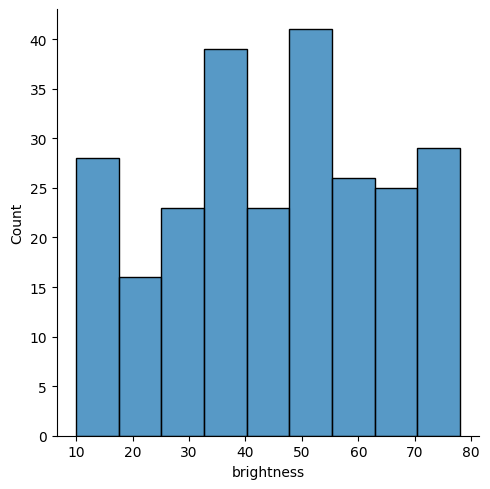

In [7]:
sns.displot(data_avocados['brightness'], kde=False)

<Axes: xlabel='weight_g', ylabel='size_cm3'>

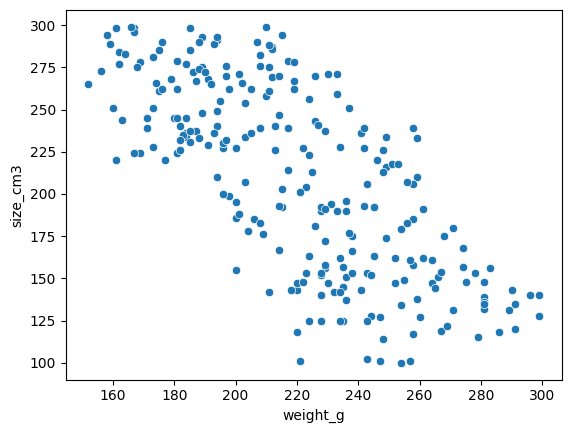

In [8]:
sns.scatterplot(x=data_avocados['weight_g'], y=data_avocados['size_cm3'])

<Axes: xlabel='weight_g', ylabel='brightness'>

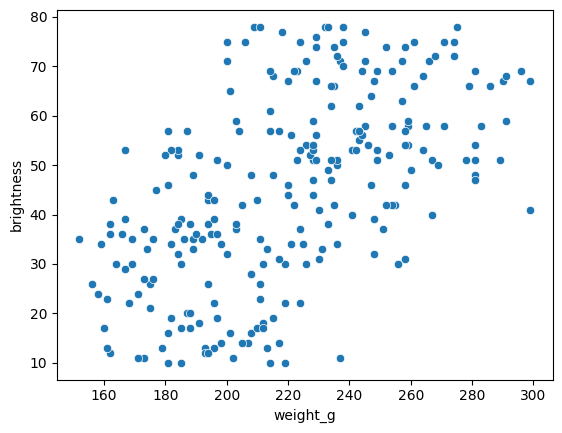

In [9]:
sns.scatterplot(x=data_avocados['weight_g'], y=data_avocados['brightness'])

#### Preparing data for Logistic Regression
Used for predicting the ripeness of the avocado

In [10]:
X = data_avocados.drop('ripeness', axis=1)
Y = data_avocados['ripeness']

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)

X.color_category = labelencoder.fit_transform(X.color_category.values)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [14]:
classifier = LogisticRegression(fit_intercept=True)
classifier.fit(x_train, y_train)

LogisticRegression()

In [15]:
predictions = classifier.predict(x_test)

<Axes: >

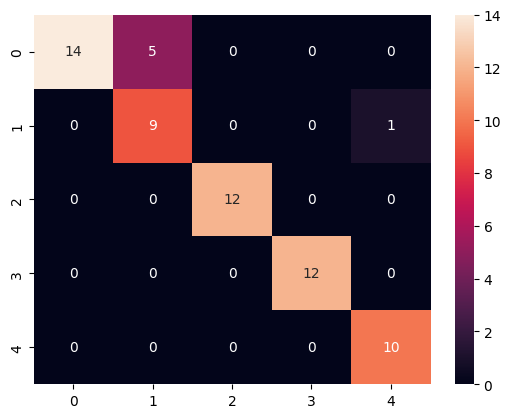

In [16]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

## There is a very big precision due to the correlation in the data

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.64      0.90      0.75        10
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       0.91      1.00      0.95        10

    accuracy                           0.90        63
   macro avg       0.91      0.93      0.91        63
weighted avg       0.93      0.90      0.91        63



In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mean_squared_error_ = mean_squared_error(y_test, predictions)
r2_score_ = r2_score(y_test, predictions)
mean_absolute_error_ = mean_absolute_error(y_test, predictions)

print("Mean Squared Error: {}".format(mean_squared_error_))
print("R2 score: {}".format(r2_score_))
print("Mean Absolute Error: {}".format(mean_absolute_error_))

Mean Squared Error: 0.2222222222222222
R2 score: 0.8954728608675041
Mean Absolute Error: 0.12698412698412698


In [19]:
## Accuracy of the model
accuracy_score(y_test, predictions)

0.9047619047619048